## Libraries

In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

## Data cleaning

### Data cleaning class

In [2]:
class clean_data:
    
    column_names_first_page = {'Unnamed: 1': 'Sector industrial',
                               'Unnamed: 2': 'Población ocupada por sexo: Hombre',
                               'Unnamed: 3': 'Población ocupada por sexo: Mujer',
                               'Unnamed: 4': 'Ingreso bruto medio en el empleo principal por sexo: Hombre',
                               'Unnamed: 5': 'Ingreso bruto medio en el empleo principal por sexo: Mujer',
                               'Unnamed: 6': 'brecha del ingreso'}
    
    column_names_second_page = {'Unnamed: 1': 'Sector industrial',
                                'Unnamed: 2': 'Población ocupada tiempo parcial por sexo: Hombre',
                                'Unnamed: 3': 'Población ocupada tiempo parcial por sexo: Mujer',
                                'Unnamed: 4': 'Ingreso bruto medio tiempo parcial en el empleo principal por sexo: Hombre',
                                'Unnamed: 5': 'Ingreso bruto medio tiempo parcial en el empleo principal por sexo: Mujer',
                                'Unnamed: 6': 'Diferencial del ingreso tiempo parcial',
                                'Unnamed: 7': 'Población ocupada tiempo completo por sexo: Hombre',
                                'Unnamed: 8': 'Población ocupada tiempo completo por sexo: Mujer',
                                'Unnamed: 9': 'Ingreso bruto medio tiempo completo en el empleo principal por sexo: Hombre',
                                'Unnamed: 10': 'Ingreso bruto medio tiempo completo en el empleo principal por sexo: Mujer',
                                'Unnamed: 11': 'Diferencial del ingreso tiempo completo'}
    
    def clean_first_page(self, df):
        
        df.drop(df.columns[0], axis=1, inplace=True)
        df.dropna(how='all', inplace=True)

        self.data_period = df['Unnamed: 2'][4].split(' ')

        df.drop([0,2,4], axis=0, inplace=True)
        df.rename(columns=self.column_names_first_page, inplace=True)

        if self.data_period[0] == 'I':
            df['Data Period quarterly'] = 1
            df['Data Period year'] = self.data_period[2]

        elif self.data_period[0] == 'II':
            df['Data Period quarterly'] = 2
            df['Data Period year'] = self.data_period[2]

        elif self.data_period[0] == 'III':
            df['Data Period quarterly'] = 3
            df['Data Period year'] = self.data_period[2]

        elif self.data_period[0] == 'IV':
            df['Data Period quarterly'] = 4
            df['Data Period year'] = self.data_period[2]

        self.total_trabajadores = df.loc[8:8].reset_index(drop=True)

        df.drop([5,6,8], axis=0, inplace=True)
        df.reset_index(drop=True, inplace=True)

        self.total_sector = df[df['Sector industrial'].str.contains('Sector|1.4 No especificado', na=False)].reset_index(drop=True)
        self.sector_publico_privado = df[df['Sector industrial'].str.contains('Público|Privado', na=False)].reset_index(drop=True)
        self.posicion_empleo = df[df['Sector industrial'].str.contains('Asalariada|Cuenta propia|Empleadora|Auxiliar no remunerado', na=False)].reset_index(drop=True)

        df.drop(df[df['Sector industrial'].str.contains('Sector', na=False)].index, inplace=True)
        df = df.drop(df.loc[16:39].index).reset_index(drop=True)
        
        df.replace(['.','-'], np.nan, inplace=True)
        self.total_trabajadores.replace(['.','-'], np.nan, inplace=True)
        self.total_sector.replace(['.','-'], np.nan, inplace=True)
        self.sector_publico_privado.replace(['.','-'], np.nan, inplace=True)
        self.posicion_empleo.replace(['.','-'], np.nan, inplace=True)
        
        return [df, self.total_trabajadores, self.total_sector, self.sector_publico_privado, self.posicion_empleo]
    
    def clean_second_page(self, df):
        
        df.drop(df.columns[0], axis=1, inplace=True)
        df.dropna(how='all', inplace=True)

        data_period = df['Unnamed: 2'][4].split(' ')
        df.drop([0,2,4], axis=0, inplace=True)
        df.rename(columns=self.column_names_second_page, inplace=True)

        if data_period[0] == 'I':
            df['Data Period quarterly'] = 1
            df['Data Period year'] = data_period[2]
        elif data_period[0] == 'II':
            df['Data Period quarterly'] = 2
            df['Data Period year'] = data_period[2]
        elif data_period[0] == 'III':
            df['Data Period quarterly'] = 3
            df['Data Period year'] = data_period[2]
        elif data_period[0] == 'IV':
            df['Data Period quarterly'] = 4
            df['Data Period year'] = data_period[2]

        total_trabajadores = df.loc[8:8].reset_index(drop=True)
        df.drop([5,6,8], axis=0, inplace=True)
        df.reset_index(drop=True, inplace=True)

        total_sector = df[df['Sector industrial'].str.contains('Sector|1.4 No especificado', na=False)].reset_index(drop=True)
        sector_publico_privado = df[df['Sector industrial'].str.contains('Público|Privado', na=False)].reset_index(drop=True)
        posicion_empleo = df[df['Sector industrial'].str.contains('Asalariada|Cuenta propia|Empleadora|Auxiliar no remunerado', na=False)].reset_index(drop=True)

        df.drop(df[df['Sector industrial'].str.contains('Sector|1. Rama de actividad', na=True)].index, inplace=True)
        df = df.drop(df.loc[16:41].index)
        
        df.replace(['.','-'], np.nan, inplace=True)
        self.total_trabajadores.replace(['.','-'], np.nan, inplace=True)
        self.total_sector.replace(['.','-'], np.nan, inplace=True)
        self.sector_publico_privado.replace(['.','-'], np.nan, inplace=True)
        self.posicion_empleo.replace(['.','-'], np.nan, inplace=True)
        
        return [df, self.total_trabajadores, self.total_sector, self.sector_publico_privado, self.posicion_empleo]

### Importing and cleaning data

In [3]:
clean = clean_data()

csvdirs = './Data/input'
years = os.listdir(csvdirs)

dataframes_first_page = []
dataframes_second_page = []

total_trabajadores_first_page = []
total_trabajadores_second_page = []

total_sector_first_page = []
total_sector_second_page = []

sector_publico_privado_first_page = []
sector_publico_privado_second_page = []

posicion_empleo_first_page = []
posicion_empleo_second_page = []


for year in years:
        csvfiles = glob.glob(os.path.join(csvdirs, year, '*.xlsx'))
        
        for csvfile in csvfiles:
                df = pd.read_excel(csvfile, sheet_name=1)
                
                result_first_page = clean.clean_first_page(df)
                dataframes_first_page.append(result_first_page[0])
                total_trabajadores_first_page.append(result_first_page[1])
                total_sector_first_page.append(result_first_page[2])
                sector_publico_privado_first_page.append(result_first_page[3])
                posicion_empleo_first_page.append(result_first_page[4])
                
                df = pd.read_excel(csvfile, sheet_name=2)
                
                result_second_page = clean.clean_second_page(df)
                dataframes_second_page.append(result_second_page[0])
                total_trabajadores_second_page.append(result_second_page[1])
                total_sector_second_page.append(result_second_page[2])
                sector_publico_privado_second_page.append(result_second_page[3])
                posicion_empleo_second_page.append(result_second_page[4])

In [4]:
result_first_page = pd.concat(dataframes_first_page, ignore_index=True)
result_total_trabajadores_first_page = pd.concat(total_trabajadores_first_page, ignore_index=True)
result_total_sector_first_page = pd.concat(total_sector_first_page, ignore_index=True)
result_sector_publico_privado_first_page = pd.concat(sector_publico_privado_first_page, ignore_index=True)
result_posicion_empleo_first_page = pd.concat(posicion_empleo_first_page, ignore_index=True)

result_second_page = pd.concat(dataframes_second_page, ignore_index=True)
result_total_trabajadores_second_page = pd.concat(total_trabajadores_second_page, ignore_index=True)
result_total_sector_second_page = pd.concat(total_sector_second_page, ignore_index=True)
result_sector_publico_privado_second_page = pd.concat(sector_publico_privado_second_page, ignore_index=True)
result_posicion_empleo_second_page = pd.concat(posicion_empleo_second_page, ignore_index=True)

### Exporting data cleaned

In [5]:
dir_check = os.listdir('Data/output')

if len(dir_check) == 0:
	result_first_page.to_csv('Data/output/result_first_page.csv')
	result_total_trabajadores_first_page.to_csv('Data/output/result_total_trabajadores_first_page.csv')
	result_total_sector_first_page.to_csv('Data/output/result_total_sector_first_page.csv')
	result_sector_publico_privado_first_page.to_csv('Data/output/result_sector_publico_privado_first_page.csv')
	result_posicion_empleo_first_page.to_csv('Data/output/result_posicion_empleo_first_page.csv')

	result_second_page.to_csv('Data/output/result_second_page.csv')
	result_total_trabajadores_second_page.to_csv('Data/output/result_total_trabajadores_second_page.csv')
	result_total_sector_second_page.to_csv('Data/output/result_total_sector_second_page.csv')
	result_sector_publico_privado_second_page.to_csv('Data/output/result_sector_publico_privado_second_page.csv')
	result_posicion_empleo_second_page.to_csv('Data/output/result_posicion_empleo_second_page.csv')
else:
    print('Dataframes already exported!')

## EDA

In [18]:
result_first_page = result_first_page.convert_dtypes()
result_second_page = result_second_page.convert_dtypes()

result_first_page.info()
result_second_page.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 8 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Sector industrial                                            182 non-null    string 
 1   Población ocupada por sexo: Hombre                           182 non-null    Int64  
 2   Población ocupada por sexo: Mujer                            182 non-null    Int64  
 3   Ingreso bruto medio en el empleo principal por sexo: Hombre  182 non-null    Float64
 4   Ingreso bruto medio en el empleo principal por sexo: Mujer   182 non-null    Float64
 5   brecha del ingreso                                           182 non-null    Float64
 6   Data Period quarterly                                        182 non-null    Int64  
 7   Data Period year                                             182 non-null    stri

In [19]:
result_first_page.head(13)

,Sector industrial,Población ocupada por sexo: Hombre,Población ocupada por sexo: Mujer,Ingreso bruto medio en el empleo principal por sexo: Hombre,Ingreso bruto medio en el empleo principal por sexo: Mujer,brecha del ingreso,Data Period quarterly,Data Period year
0,"Agricultura, ganadería y pesca",229512,36759,334316.274224,374773.703244,112.101543,4,2018
1,Industria manufacturera,154018,83006,419304.673749,336096.435425,80.155662,4,2018
2,Construcción,137657,2424,358193.359928,348158.226811,97.198403,4,2018
3,Otros3/,24568,2375,870981.400962,557126.346316,63.965355,4,2018
4,Comercio y reparación,217753,149391,409698.678646,263725.282086,64.370547,4,2018
5,Transporte y almacenamiento,97429,12185,370475.596764,562934.632734,151.94918,4,2018
6,Hoteles y restaurantes,56809,74162,410051.21817,252698.11445,61.625988,4,2018
7,Intermediación financiera y de seguros,27208,18415,875702.2645,787346.105774,89.910251,4,2018
8,Actividades profesionales y administrativas de...,140016,63611,426446.968007,446988.445957,104.816889,4,2018
9,Administración pública,52331,33875,890258.586599,1057642.172422,118.801682,4,2018


In [21]:
result_second_page.head(11)

,Sector industrial,Población ocupada tiempo parcial por sexo: Hombre,Población ocupada tiempo parcial por sexo: Mujer,Ingreso bruto medio tiempo parcial en el empleo principal por sexo: Hombre,Ingreso bruto medio tiempo parcial en el empleo principal por sexo: Mujer,Diferencial del ingreso tiempo parcial,Población ocupada tiempo completo por sexo: Hombre,Población ocupada tiempo completo por sexo: Mujer,Ingreso bruto medio tiempo completo en el empleo principal por sexo: Hombre,Ingreso bruto medio tiempo completo en el empleo principal por sexo: Mujer,Diferencial del ingreso tiempo completo,Data Period quarterly,Data Period year
0,"Agricultura, ganadería y pesca",77764,18104,205479.236973,287667.042152,-39.998107,151748,18655,362275.875898,486398.870359,-34.262009,4,2018
1,Industria manufacturera,18973,29209,257237.673731,120207.344505,53.26993,135045,53797,453237.953382,472972.594833,-4.354146,4,2018
2,Construcción,20751,408,215243.297192,66000.0,69.337024,116906,2016,367414.80802,331776.907001,9.699637,4,2018
3,Otros5/,780,215,538515.36643,199031.007752,63.040793,23788,2160,928551.452673,616505.276792,33.605696,4,2018
4,Comercio y reparación,37648,62154,252401.980311,99995.500671,60.382442,180105,87237,414315.792924,375551.470855,9.356226,4,2018
5,Hoteles y restaurantes,13017,38469,284423.324433,133214.134769,53.163428,43792,35693,379585.421347,368161.883111,3.009478,4,2018
6,Actividades profesionales y administrativas de...,29464,15927,313992.937928,289146.178153,7.913159,110552,47684,468245.446236,498302.647188,-6.419112,4,2018
7,Enseñanza y salud,14494,40936,499759.649097,541750.368911,-8.402183,58747,90294,1104762.771605,881016.852414,20.252847,4,2018
8,Comunicación y otros servicios6/,29080,41009,142573.576692,99869.191434,29.952524,63373,36571,668675.428912,556204.883994,16.819901,4,2018
9,Hogares como empleadores,9652,87774,133939.016865,100328.606791,25.093816,9667,52265,288292.533014,215611.131148,25.21099,4,2018


In [25]:
result_first_page.describe()

,Población ocupada por sexo: Hombre,Población ocupada por sexo: Mujer,Ingreso bruto medio en el empleo principal por sexo: Hombre,Ingreso bruto medio en el empleo principal por sexo: Mujer,brecha del ingreso,Data Period quarterly
count,182.000000,182.000000,1.820000e+02,1.820000e+02,182.000000,182.000000
mean,98053.065934,59810.021978,5.271076e+05,5.078097e+05,96.994546,2.500000
std,65170.395713,46321.011555,2.441063e+05,2.976241e+05,46.249203,1.183449
min,9652.000000,1964.000000,2.153531e+05,1.443148e+05,47.714921,1.000000
25%,42297.500000,20191.750000,3.412112e+05,2.757714e+05,68.548697,1.000000
50%,93195.000000,58042.500000,4.247274e+05,4.171267e+05,86.526139,2.500000
75%,136129.000000,84327.000000,7.442244e+05,7.477345e+05,109.065675,4.000000
max,233604.000000,165313.000000,1.110167e+06,1.368010e+06,425.546573,4.000000


In [26]:
result_second_page.describe()

,Población ocupada tiempo parcial por sexo: Hombre,Población ocupada tiempo parcial por sexo: Mujer,Ingreso bruto medio tiempo parcial en el empleo principal por sexo: Hombre,Ingreso bruto medio tiempo parcial en el empleo principal por sexo: Mujer,Diferencial del ingreso tiempo parcial,Población ocupada tiempo completo por sexo: Hombre,Población ocupada tiempo completo por sexo: Mujer,Ingreso bruto medio tiempo completo en el empleo principal por sexo: Hombre,Ingreso bruto medio tiempo completo en el empleo principal por sexo: Mujer,Diferencial del ingreso tiempo completo,Data Period quarterly
count,154.000000,153.000000,1.540000e+02,153.000000,151.000000,154.000000,154.000000,1.540000e+02,1.540000e+02,154.000000,154.000000
mean,30385.175325,29780.947712,2.688157e+05,237335.012034,9.080565,85495.720779,41097.006494,5.712922e+05,5.578271e+05,0.959500,2.500000
std,22135.213932,24548.783677,1.535775e+05,187136.085915,60.701178,52173.218340,29692.381998,2.262837e+05,2.390857e+05,27.111680,1.184044
min,780.000000,0.000000,1.061910e+05,0.000000,-337.020069,3969.000000,683.000000,2.882925e+05,1.956930e+05,-119.716418,1.000000
25%,13466.750000,8075.000000,1.843439e+05,109361.462785,-13.486398,41556.500000,16871.500000,3.798725e+05,3.720249e+05,-9.694333,1.000000
50%,27301.500000,26495.000000,2.169868e+05,135098.562766,27.502709,83584.000000,40093.500000,4.749289e+05,4.912048e+05,6.667092,2.500000
75%,37993.000000,45672.000000,2.983014e+05,340416.402918,48.062102,130756.250000,54114.500000,7.580465e+05,7.250180e+05,18.986539,4.000000
max,90566.000000,98254.000000,1.085345e+06,1000000.000000,74.911619,196105.000000,130592.000000,1.104763e+06,1.085610e+06,45.348384,4.000000


In [85]:
def create_bloxplot(data, y_labels, tittle):
    fig = plt.figure(figsize =(10, 7))
    ax = fig.add_subplot(111)
    
    bp = ax.boxplot(data, patch_artist = True, 
                    notch ='True', vert = 0)
    
    colors = ['#0000FF', '#00FF00',
              '#FFFF00', '#FF00FF']
    
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    for whisker in bp['whiskers']:
        whisker.set(color ='#8B008B',
                    linewidth = 1.5,
                    linestyle =":")
        
    for cap in bp['caps']:
        cap.set(color ='#8B008B',
                linewidth = 2)
        
    for median in bp['medians']:
        median.set(color ='red',
                   linewidth = 3)
        
    ax.set_yticklabels(y_labels)
    
    plt.title(tittle)
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    plt.show()

### Distrucion de ingresos brutos y pobacion ocupada 2018 - 2022

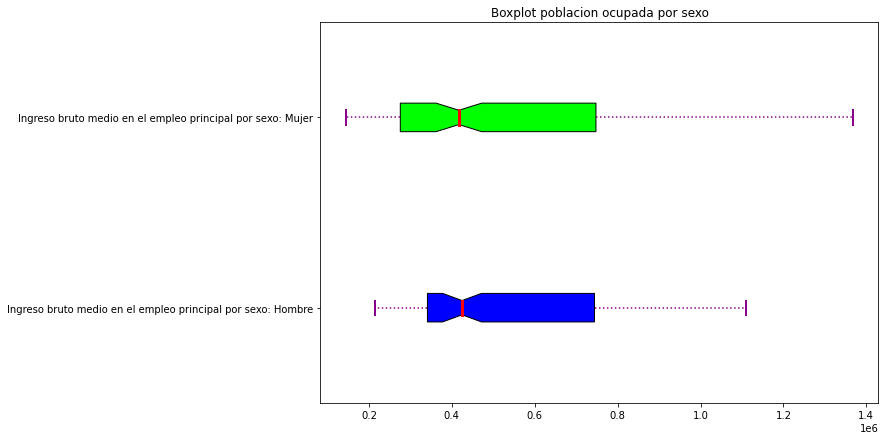

In [92]:
create_bloxplot(result_first_page[result_first_page.columns[3:5]],
                ['Ingreso bruto medio en el empleo principal por sexo: Hombre', 'Ingreso bruto medio en el empleo principal por sexo: Mujer'], 
                'Boxplot poblacion ocupada por sexo')

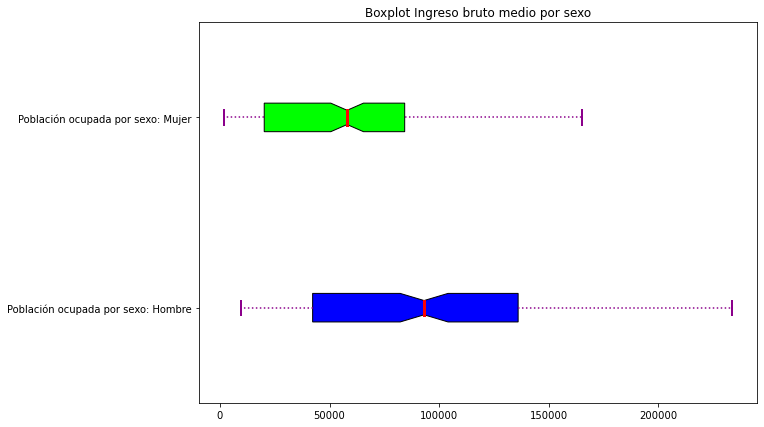

In [93]:
create_bloxplot(result_first_page[result_first_page.columns[1:3]],
                ['Población ocupada por sexo: Hombre','Población ocupada por sexo: Mujer'], 
                'Boxplot Ingreso bruto medio por sexo')

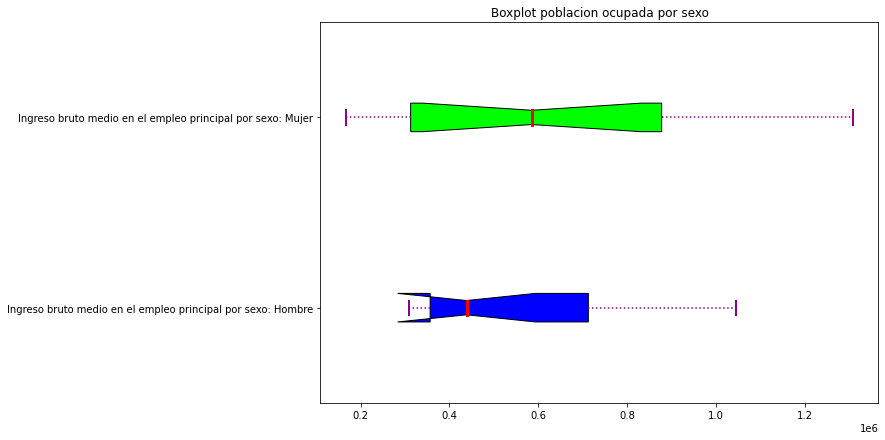

In [102]:
data_2018 = result_first_page.loc[result_first_page['Data Period year'] == '2022']

create_bloxplot(data_2018[data_2018.columns[3:5]],
                ['Ingreso bruto medio en el empleo principal por sexo: Hombre', 'Ingreso bruto medio en el empleo principal por sexo: Mujer'], 
                'Boxplot poblacion ocupada por sexo')